<h1 style="text-align: center;">Semantic Similarity Assignment</h1>
<h2 style="text-align: center;">December 11, 2025</h2>
<h3 style="text-align: center;">Yucheng Bao</h3>

### Introduction
Becoming self-regulated benefits students in multiple ways during their learning process. Therein, the regulation of motivation has been identified as an essential component of self-regulated learning, as motivation is associated with academic persistence, effort-making, and performance (Zimmerman & Schunk, 2012). To understand the strategies students use in relation to their motivational regulation, researchers have developed survey methods (Wolters, 1999; Schwinger et al., 2009). For instance, students may be asked to rate the likelihood or frequency of use of described strategies in hypothetical learning situations or through their retrospective learning reflections, using a Likert scale. However, researchers note that the use of closed-ended (Likert-scale, forced-choice) questions can lead to biased responses because it prevents respondents from describing the strategies they use freely (Zepeda & Nokes-Malach, 2021). Given this limitation, Mottett et al. (in prep) examine 146 students’ open-ended responses regarding their motivational experiences and manually categorize the motivational strategies mentioned in the responses using an inductive, qualitative thematic coding method. The results demonstrate that while students employed a variety of strategies covered in existing questionnaires, they also used strategies not included (e.g., motivating others and fear of failure), which reflects the advantage of qualitative approaches in capturing nuances in students’ thoughts and behaviors.

A coin has two sides. Although qualitative coding provides rich insights into students’ motivational experiences, it requires extensive time and human resources, making it impractical for large databases with thousands of samples. In contrast, natural language processing (NLP) offers significant advantages, as it possesses the capability to analyze extensive textual datasets while uncovering intricate patterns efficiently (Gamieldien et al., 2023). Research has shown the utility of NLP approaches for conducting traditional thematic analysis using Term Frequency–Inverse Document Frequency (TF-IDF) and the Word2Vec method. This study aims to explore the application of NLP in the education area, in the learning environment of a large-scale digital learning platform designed for middle school math education (6th-8th grades).

Given that most previous research on students’ motivational regulation has focused on college student groups (Miele et al., in prep), this study extends the probe to the high school math learning context, contributing early evidence from a younger population. In addition, by comparing TF-IDF outputs with human annotations, this study examines the extent to which automated analyses by an NLP algorithm align with human qualitative judgments. TF-IDF is appropriate in this setting because it highlights distinctive linguistic features in students’ open-ended responses, enabling us to identify words meaningful to different motivational strategies. Meanwhile, it provides an interpretable and theoretically grounded way to probe how motivational processes surface in language. This comparison offers insights into NLP’s potential as a complementary tool for motivational research.

### Research Questions
Do students’ written responses that are labeled as using a specific motivational regulation strategy (e.g., Willpower, Performance Self-Talk, or Effort) show higher semantic similarity to the TF-IDF–derived keywords for that strategy compared to responses labeled as not using that strategy?

### Hypothese
Responses coded as exhibiting a given motivational strategy (i.e., labeled as “1”) will show significantly higher semantic similarity to the TF-IDF–derived keyword set for that strategy than responses coded as not exhibiting the strategy (i.e., labeled as “0”).

### Data
The current study is a pilot study of a larger project involving 5404 middle school students (Grades 6-8) enrolled in MATHia, a digital Math Learning platform that provides complementary instructional support. Students receive math instruction (middle-school-level algebra) and then use MATHia to reinforce, supplement, and practice the math concepts they are learning (see Fig. 1 for an interface demonstration). After the overall instructional sessions, students were prompted to respond to an open-ended question: “As you were working on this content, how did you motivate yourself? Please describe in as much detail as you can.” Due to the data privacy agreement and the scope of the research interests, demographic information for the school districts, schools, teachers, and students involved in this study is not disclosed. The sample consists of students from three schools located in metropolitan areas of Texas.

<figure>
  <img src="Assignment_files/MATHia Demonstration.png" alt="Fig. 1" style="width:100%">
  <figcaption><strong>Fig. 1:</strong> Interface of a learning session in the MATHia</figcaption>
</figure>

An open-ended question coding team comprised two research assistants (RAs) and two principal investigators (PIs). First, the two RAs read through a random sample of 30% of the total data and individually categorized student responses into different strategies following the coding protocol developed by Mottett et al. (in prep). Specifically, “0” indicates that the response does not exhibit a particular motivational strategy, and “1” indicates that the response explicitly demonstrates or mentions one strategy. The two RAs then discussed and compared their categories, resolving any discrepancies that emerged. If an unlabeled motivational strategy repeatedly appeared during this initial review, the RAs consulted with the PIs to determine whether the pattern reflected a conceptually distinct theme. Together, the team engaged in iterative discussions to define, refine, and formalize this new category before proceeding with full dataset coding. From there, they developed a sample-adaptive protocol that included explanations of the strategies and example responses. The two RAs then coded another random sample used to develop the protocol (30% of the data). Using this refined protocol, the two RAs coded another random 30% sample. Once interrater reliability reached acceptable thresholds (Cohen’s κ > .70 and >90% agreement), the RAs independently coded the remaining responses.

At the time of analysis, the whole coding process was still ongoing. Therefore, the present study focuses on a subsample of raw student responses (Nraw = 814) that had already been fully coded according to the finalized coding protocol. Meanwhile, I conducted an additional manual inspection of the coded dataset to examine the frequency distribution of each motivational strategy. Based on this inspection, the current analysis focuses on the three observed motivational strategy categories: Willpower, Performance Self-Talk, and Effort, as these strategies appeared most frequently and provided a strong foundation for modeling students’ motivational patterns. A condensed coding protocol is provided in Table 1.


<img src="Assignment_files/images/Coding Rubric.png" style="width:100%">

#### Data Cleaning and Preprocessing
All open-ended responses were processed using a multi-stage text-cleaning pipeline designed to remove noise, standardize linguistic structure, and prepare the data for subsequent natural language processing (NLP) analyses.
##### _Text Normalization_
We first standardized the raw text input to ensure uniform formatting across responses. All entries were converted to strings and converted to lowercase. Non-alphabetic characters, such as numbers, punctuation, and symbols, were removed by using regular expressions. Responses containing fewer than three characters were excluded at this stage, as they are more likely not to contain interpretable linguistic content.

In [20]:
# Set up working directory & Import necessary
import os
from spacy.lang.ja.syntax_iterators import labels
os.chdir('/Users/zepedalab/Desktop/MATHia_NLP_YB')

import pandas as pd # for manipulating dataframe
import re # for regular expression
import spacy #for NLP analysis
#!python3 -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

In [21]:
# Import Data File
text_df = pd.read_excel('/Users/zepedalab/Desktop/MATHia_NLP_YB/NLP Dataset.xlsx')

In [22]:
# Pre-process the text data (text_df)
# Convert the text input to the lower case string
# Remove all non-alphabetic characters
text_df['input'] = text_df['input'].astype(str)
text_df['input'] = text_df['input'].str.lower()
text_df['input'] = text_df['input'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
# Filter out any input that comprise less than 3 characters
text_df = text_df[text_df['input'].str.len() >= 3]
short_input_df = text_df[text_df['input'].str.len() < 3] #short_input_df allows us to manually check

##### _Nonsense String Detection and Removal_
During the initial manual review of students’ open-ended responses, we observed a substantial number of entries that were nonsensical or nonlinguistic (such as random characters, repeated letters, or strings lacking semantic content), which required further preprocessing. To address this issue, I implemented a two-step noise-removal procedure designed to identify and remove such unusable inputs. First, the nostril nonsense detector was applied to evaluate whether a text contains irregular or nonlinguistic character patterns (Hucka, 2018). All responses that were classified as nonsense were excluded. As the nostril nonsense detector requires a minimum string length of 6 characters for classification, some short strings cannot be evaluated. I then used a trained gibberish-detection model that imposes no length requirement on the remaining responses that had passed the nostril nonsense detector (Neuhaus & Ruvinskiy, 2015). Any input classified as gibberish was removed. While both tools have limitations and may not perfectly detect all forms of nonlinguistic input, using them in combination allowed us to remove the majority of uninterpretable responses and retain, to the greatest extent possible, linguistically meaningful texts suitable for subsequent NLP analysis.

In [23]:
# Detecting the nonsense string
from nostril import nonsense
short_indices = []
nonsense_indices = []

# Iterate through rows and separate nonsense rows
for index, row in text_df.iterrows():
    try:
        text = row['input']
        if len(text) < 6: # Check if the text is too short to test
            # Add the short text to short_text_df
            if len(text) < 6:
                short_indices.append(index)
            continue

        # Use nostril to detect nonsense in the current row's text
        if nonsense(text):
            nonsense_indices.append(index)

    except Exception as e:
        msg = str(e)
        if "Text is too short to test" in msg:
             short_indices.append(index)
        else:
            print(f"Error processing row {index}: {e}")

short_text_df = text_df.loc[short_indices]
nonsense_df = text_df.loc[nonsense_indices]
text_df = text_df.drop(nonsense_indices)

In [24]:
# Quicklook on the first 10 nonsense string
nonsense_df.input[:10]

4                                  jjjnnknjmimkkikiilkin
99                                           ummmmmm idk
103    jjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjj...
159                                              yayyyyy
162    dddddddddddddddddddddddddddddddddddddddddddddd...
263                            iiiiiiiiiiiiiiiiiiiiii kj
359                                           v guvghibj
463                                             ndcfksdj
480                                   ibhuiygutgcytuyvjh
505                                               jkkkkk
Name: input, dtype: object

In [25]:
# Pre-process those shor input by using the gibberish detector
from gibberish_detector import detector
Detector = detector.create_from_model('/Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model')

In [26]:
gibberish_indices = []
# Iterate through rows and separate gibberish rows
for index, row in text_df.iterrows():
    try:
        # Check if the row is gibberish
        is_gibberish = Detector.is_gibberish(row['input'])

        # If it is gibberish, add to the gibberish_df and remove from text_df_3
        if is_gibberish:
            gibberish_indices.append(index)

    except Exception as e:
        print(f"Error processing row {index}: {e}")

gibberish_df = text_df.loc[gibberish_indices]
text_df = text_df.drop(gibberish_indices)

In [27]:
# Quicklook on the first 10 gibberish string
gibberish_df.input[:10]

93      bruhhhh
111    r gtktnq
113         idk
190         idk
191         idk
193         kjh
213        kklj
246         idk
254        jhgj
258         idk
Name: input, dtype: object

##### _Linguistic Preprocessing_
After removing nonsensical and gibberish responses, 598 responses were left in the text sample. I then applied a standardized linguistic preprocessing pipeline to prepare the text for downstream natural language processing analyses. All remaining responses were processed using spaCy’s large English language model, which provided efficient and consistent tokenization and lemmatization. Each response was passed through a custom preprocessing function in which spaCy tokenized the text and converted each token to its lemma (e.g., studying, studied, studies → study). To focus analyses on meaningful content words, we removed all English stopwords identified by spaCy (e.g., the, and, but) as well as any tokens that were non-alphabetic (e.g., numbers, mixed alphanumeric strings, or symbols). Remaining tokens were converted to lowercase to ensure consistent representation. This pipeline occasionally produced responses that contained no valid tokens after stopword removal and filtering (e.g., responses composed entirely of discarded words). These responses were excluded from further analysis to maintain a dataset consisting only of linguistically interpretable entries. The final filtered dataset retained only responses that contained at least one valid lemma. These cleaned tokens were stored in the data frame and also used to generate string-based representations for downstream procedures such as building the bag-of-words corpus, computing TF–IDF features, and conducting semantic similarity analyses. After the linguistic preprocessing, the final dataset contained 580 documents and 560 unique word features in the TF–IDF matrix.


In [9]:
# Load spacy model
nlp = spacy.load("en_core_web_lg")

# Define a helper function to process text using spaCy
def spacy_preprocessor(texts):
    processed_docs = []
    # disable parser and ner for speed since we only need tokenization/lemmatization
    for doc in nlp.pipe(texts, disable=["parser", "ner"]):
        # Lemmatize, lowercase, remove stopwords and non-alphabetic chars
        tokens = [
            token.lemma_.lower()
            for token in doc
            if not token.is_stop and token.is_alpha
        ]
        processed_docs.append(tokens)
    return processed_docs

# Call the helper function for Tokenize and lemmatize
tokenized_docs = spacy_preprocessor(text_df['input'].astype(str))

# Add tokens to dataframe temporarily to keep alignment safe
text_df['tokens'] = tokenized_docs

# Filter rows where the token list is not empty
text_df_filtered = text_df[text_df['tokens'].map(len) > 0].copy()

# Create the filtered docs list for Gensim
filtered_docs = text_df_filtered['tokens'].tolist()

# Create the cleaned string representation
text_df_filtered["cleaned_input"] = text_df_filtered['tokens'].apply(lambda x: ' '.join(x))


#### TF-IDF and Semantic Similarity Analysis
I first generated a bag-of-words matrix in which each response was encoded as counts of all unique lemmatized tokens. Term frequency (TF) was then computed by dividing each token count by the total number of tokens within the response. Next, I calculated inverse document frequency (IDF) for each word as the logarithm of the total number of responses divided by the number of responses in which the word appeared. The final TF–IDF matrix was obtained by multiplying the TF matrix by the IDF values, producing a weighted representation, in which words that were distinctive to individual responses received higher scores, while commonly used words received lower scores.

In [10]:
import gensim
from gensim import corpora
# create empty dictionary from gensim library (for the vocabulary)
dictionary = gensim.corpora.Dictionary()
# iteratively add each doc to the bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in text_df_filtered["tokens"]]

In [11]:
import numpy as np
# Get vocab from dictionary
vocab = pd.Series(dictionary.token2id).index

# Sequence of numbers as long as the documents
index = range(len(bow_corpus))

# Create a pandas dataframe full of zeros.
bow_df = pd.DataFrame(data=np.zeros((len(bow_corpus), len(dictionary)), dtype=np.float32),
                  index=index, # row labels
                  columns=vocab) #column labels

# Add each word from the bag-of-words corpus to the matrix.
for idx in index:
  for id, freq in bow_corpus[idx]:
    bow_df.loc[idx,dictionary[id]] = freq

# Transpose the matrix for easy reading
bow_df

,awaly,time,well,nan,ask,classmate,classs,fellow,focus,help,...,fun,create,different,anymore,suffer,motivational,disiplince,carefully,big,dream
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Calculating Inverse Document Frequency
num_documents = len(bow_df) #get the length of the documents

# function of idf
def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  return np.log(num_documents+1/documents_containing_term+1)  # divide the number of documents by the num documents with the term and get the log.

# dictionary comprehension to apply the idf function to every word (column) in the bow_df DataFrame
idf = pd.Series({term:idf(term) for term in bow_df.columns}) # create dictionary with key value pair of term:idf(term)

#Calculate Term Frequency
# divide each token count by the total token count for the row.
tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows')

#Calculate the TF-IDF score
tfidf_df = tf_df.copy().multiply(idf, axis='columns')
# make copy of tf_df that is tf/idf

# Quick view on tf-idf metrix
tfidf_df



,awaly,time,well,nan,ask,classmate,classs,fellow,focus,help,...,fun,create,different,anymore,suffer,motivational,disiplince,carefully,big,dream
0,2.122157,2.121636,2.121655,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,6.364768,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,6.364768,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,6.364768,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.414418,0.70729,0.707386,0.707386,0.707206,0.707202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
576,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.591618,1.591618
577,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
578,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


To identify the linguistic features that most characterize each motivational regulation strategy, I extracted high-TF-IDF-value keywords for each strategy category (Willpower, Performance Self-Talk, and Effort) from students' responses coded as “1” by human coders (strategy present). Specifically, I implemented a helper function that computed the word-level TF–IDF value by averaging the TF-IDF metric across documents. Words were then sorted in descending order, and the top 50 highest-weighted words were selected as the most distinctive keywords for a particular strategy. The extracted keyword lists were stored for use in subsequent semantic similarity analyses, where they served as reference representations of each strategy’s linguistic signature.


In [13]:
# Helper function: identify the top 50 keywords
def top_tfidf_words(tfidf_df, labels, top_n=50):

    labels = pd.Series(labels).reset_index(drop=True)
    labels_num = pd.to_numeric(labels, errors="coerce")

    valid_mask = labels_num.isin([0, 1])

    tfidf_clean  = tfidf_df.iloc[valid_mask.values]
    labels_clean = labels_num[valid_mask].astype(int)

    group_means = tfidf_clean.groupby(labels_clean).mean()

    results = {}
    for label_value in [0, 1]:
        if label_value not in group_means.index:
            continue

        mean_vec = group_means.loc[label_value]
        top_words = (
            mean_vec.sort_values(ascending=False)
                    .head(top_n)
                    .reset_index()
        )
        top_words.columns = ["word", "mean_tfidf"]
        results[f"label_{label_value}"] = top_words

    return results


In [14]:
# Helper function: Identify the positive and negative keywords for each strategy category
def pos_neg_features(code_col, text_df_filtered, tfidf_df, top_n=50):
    labels = text_df_filtered[code_col]
    top_dict = top_tfidf_words(tfidf_df, labels, top_n=top_n)
# Positive keywords are extract from students' responses that labeled as 1 (strategy present)
    pos = (
        top_dict["label_1"].set_index("word")["mean_tfidf"]
        if "label_1" in top_dict else pd.Series(dtype=float)
    )
# Negative keywords are extract from students' responses that labeled as 0 (strategy absent)
    neg = (
        top_dict["label_0"].set_index("word")["mean_tfidf"]
        if "label_0" in top_dict else pd.Series(dtype=float)
    )

    return pos, neg
##    Returns:
##        pos: Series of top TF-IDF words for label=1
##        neg: Series of top TF-IDF words for label=0

In [15]:
# Define a helper function to make the table, presenting the keywords and tfidf values
def make_side_by_side_table(pos, neg, code_name):
    df_pos = pos.reset_index()
    df_pos.columns = ['Label_1_Word', 'Label_1_Value']

    df_neg = neg.reset_index()
    df_neg.columns = ['Label_0_Word', 'Label_0_Value']

    max_len = max(len(df_pos), len(df_neg))
    df_pos = df_pos.reindex(range(max_len))
    df_neg = df_neg.reindex(range(max_len))

    table = pd.concat([df_pos, df_neg], axis=1)

    print(f"\n=== {code_name}: Label 1 vs Label 0 Top TF-IDF Words ===")
    display(table)

    return table


In [16]:
# Pull out the key word tabel for each category
side_by_side_tables = {}
reduced_results = {}

codes = ["Willpower", "Performance Self-Talk", "Effort"]

for code in codes:
    pos, neg = pos_neg_features(
        code_col=code,
        text_df_filtered=text_df_filtered,
        tfidf_df=tfidf_df,
        top_n=50
    )

    if code not in reduced_results:
        reduced_results[code] = {}

    reduced_results[code]['pos_features'] = list(pos.index)
    reduced_results[code]['neg_features'] = list(neg.index)

    table = make_side_by_side_table(pos, neg, code)
    side_by_side_tables[code] = table



=== Willpower: Label 1 vs Label 0 Top TF-IDF Words ===


,Label_1_Word,Label_1_Value,Label_0_Word,Label_0_Value
0,try,0.697430,nan,1.326552
1,work,0.543866,not,0.290217
2,good,0.541155,motivate,0.243253
3,go,0.455640,grade,0.139658
4,motivate,0.299894,good,0.135442
5,hard,0.299654,math,0.131546
6,want,0.234616,tell,0.106814
7,tell,0.229335,work,0.097576
8,mathia,0.221055,yes,0.097149
9,push,0.212626,get,0.084227



=== Performance Self-Talk: Label 1 vs Label 0 Top TF-IDF Words ===


,Label_1_Word,Label_1_Value,Label_0_Word,Label_0_Value
0,grade,1.201788,nan,1.191138
1,motivate,0.467910,not,0.272980
2,good,0.460869,motivate,0.232837
3,think,0.283922,good,0.184597
4,math,0.237303,try,0.182617
5,want,0.184136,work,0.182119
6,mathia,0.165360,tell,0.141001
7,get,0.161105,go,0.122839
8,improve,0.145609,hard,0.107118
9,work,0.139475,mathia,0.095485



=== Effort: Label 1 vs Label 0 Top TF-IDF Words ===


,Label_1_Word,Label_1_Value,Label_0_Word,Label_0_Value
0,problem,0.357891,nan,1.163708
1,motivate,0.276223,not,0.270122
2,try,0.265880,motivate,0.252157
3,question,0.211292,good,0.220694
4,work,0.209537,work,0.176202
5,hard,0.189957,try,0.168034
6,help,0.167790,tell,0.130564
7,hint,0.154191,grade,0.124556
8,knowlge,0.148057,go,0.122606
9,wrong,0.143549,mathia,0.107898


I then examined whether responses coded as exhibiting a given motivational strategy (i.e., labeled as 1) were more semantically close to the corresponding keyword set than responses coded as not exhibiting that strategy (i.e., labeled as 0). For each strategy, the reference text and each student's response were processed with spaCy’s large English-language model to obtain a dense semantic vector representation. I computed a semantic similarity score by taking the cosine similarity between the student response vector and the strategy-specific reference keyword vector. Eventually, for each strategy, a distribution of similarity scores for responses coded as strategy absent (0) and a corresponding distribution for responses coded as strategy present (1) were produced.


In [17]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

#Helper function: For a given strategy category (e.g., 'Willpower'):
#      (1) use reduced_results[code_name]['pos_features'] as reference words
#      (2) compute spaCy similarity for each response in text_df_filtered
#      (3) run Welch t-test between label 0 and 1

def spacy_similarity_for_code(code_name, reduced_results, text_df_filtered,
                              text_col="input"):


    # Initialize default empty outputs
    sim_scores = pd.Series(dtype=float, name=f"{code_name}_sim")
    sims_0 = pd.Series(dtype=float, name=f"{code_name}_sim_0")
    sims_1 = pd.Series(dtype=float, name=f"{code_name}_sim_1")
    t = np.nan
    p = np.nan

    # Get positive feature words as a reference doc
    entry = reduced_results.get(code_name, {})
    pos_words = entry.get("pos_features", [])

    if not pos_words:
        print(f"[{code_name}] No positive features stored; skipping similarity.")
        return sim_scores, sims_0, sims_1, (t, p)
    ref_text = " ".join(pos_words)
    ref_doc  = nlp(ref_text)

    # Check and call the labels column (human coding)
    if code_name not in text_df_filtered.columns:
        print(f"[{code_name}] No column named '{code_name}' in text_df_filtered; skipping.")
        return sim_scores, sims_0, sims_1, (t, p)

    labels_raw = pd.to_numeric(text_df_filtered[code_name], errors="coerce")
    valid_mask = labels_raw.isin([0, 1])

    if valid_mask.sum() < 2:
        print(f"[{code_name}] Not enough valid labeled rows; skipping.")
        return sim_scores, sims_0, sims_1, (t, p)

    labels = labels_raw[valid_mask].astype(int)

    # Extract texts
    texts = text_df_filtered.loc[valid_mask, text_col].fillna("").astype(str)

    # Skip if all texts are empty
    if (texts.str.len() == 0).all():
        print(f"[{code_name}] All valid texts are empty; skipping.")
        return sim_scores, sims_0, sims_1, (t, p)

    # Compute the semantic similarity score
    docs = list(nlp.pipe(texts))
    sim_scores = pd.Series(
        [doc.similarity(ref_doc) for doc in docs],
        index=texts.index,
        name=f"{code_name}_sim"
    )

    # Split by label and conduct the Welch t-test
    sims_0 = sim_scores[labels == 0]
    sims_1 = sim_scores[labels == 1]

    if len(sims_0) == 0 or len(sims_1) == 0:
        print(f"[{code_name}] One label group is empty; skipping t-test.")
        return sim_scores, sims_0, sims_1, (t, p)

    t, p = ttest_ind(sims_1, sims_0, equal_var=False)

    print(f"\n=== {code_name}: Welch's t-test on semantic similarity by group ===")
    print(f"Mean similarity (label 0): {sims_0.mean():.4f}  (n={len(sims_0)})")
    print(f"Mean similarity (label 1): {sims_1.mean():.4f}  (n={len(sims_1)})")
    print(f"t = {t:.4f}, p = {p:.4f}")

    return sim_scores, sims_0, sims_1, (t, p)


To test the hypothesis, a Welch’s two-sample t-test was conducted, allowing unequal variances and unbalanced sample sizes, to compare similarity scores between the “0” and “1” groups for each strategy.

In [18]:
# Print out results from t-test
similarity_results = {}

for code in codes:

    sim_scores, sims_0, sims_1, (t, p) = spacy_similarity_for_code(
        code_name=code,
        reduced_results=reduced_results,
        text_df_filtered=text_df_filtered,
        text_col="input"   # or "cleaned_input"
    )

    similarity_results[code] = {
        "sim_scores": sim_scores,
        "sims_0": sims_0,
        "sims_1": sims_1,
        "t": t,
        "p": p
    }


/var/folders/13/9q4w_lnj0w5c08cw7_g1z1gr0000gn/T/ipykernel_39528/2725011038.py:56: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  [doc.similarity(ref_doc) for doc in docs],



=== Willpower: Welch's t-test on semantic similarity by group ===
Mean similarity (label 0): 0.6412  (n=475)
Mean similarity (label 1): 0.8642  (n=105)
t = 13.5097, p = 0.0000


/var/folders/13/9q4w_lnj0w5c08cw7_g1z1gr0000gn/T/ipykernel_39528/2725011038.py:56: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  [doc.similarity(ref_doc) for doc in docs],



=== Performance Self-Talk: Welch's t-test on semantic similarity by group ===
Mean similarity (label 0): 0.6526  (n=529)
Mean similarity (label 1): 0.8562  (n=51)
t = 7.6240, p = 0.0000

=== Effort: Welch's t-test on semantic similarity by group ===
Mean similarity (label 0): 0.6448  (n=536)
Mean similarity (label 1): 0.8826  (n=43)
t = 15.2425, p = 0.0000


/var/folders/13/9q4w_lnj0w5c08cw7_g1z1gr0000gn/T/ipykernel_39528/2725011038.py:56: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  [doc.similarity(ref_doc) for doc in docs],


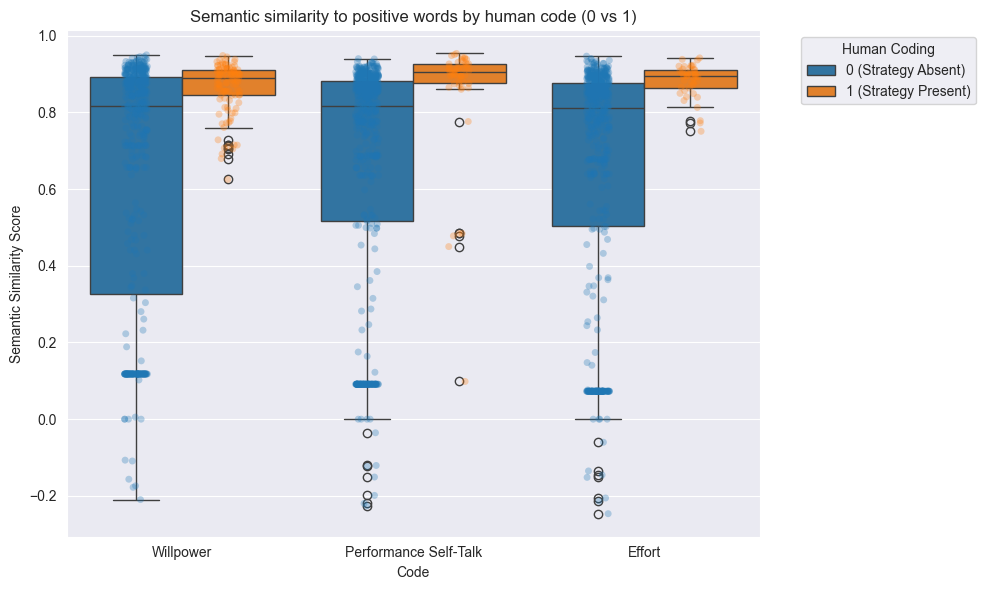

In [19]:
# Visualize the results of t-test
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rows = []

for code in codes:   # codes variable is defined above: ['Willpower','Performance Self-Talk','Effort']
    # similarity scores for this code (Series)
    sims = similarity_results[code]['sim_scores']   # from spacy_similarity_for_code

    # corresponding human labels (0/1) from text_df_filtered
    labels_raw = pd.to_numeric(text_df_filtered.loc[sims.index, code], errors="coerce")

    # keep only rows with valid 0/1 labels
    valid_mask = labels_raw.isin([0, 1])
    sims_use   = sims[valid_mask]
    labels_use = labels_raw[valid_mask].astype(int)

    # collect into long format
    for idx in sims_use.index:
        rows.append({
            "code": code,
            "label": labels_use.loc[idx],
            "similarity": sims_use.loc[idx]
        })

plot_df = pd.DataFrame(rows)

# Human-readable label text
plot_df["label_str"] = plot_df["label"].map({0: "0 (Strategy Absent)", 1: "1 (Strategy Present)"})

plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    data=plot_df, x="code", y="similarity", hue="label_str"
)
sns.stripplot(
    data=plot_df, x="code", y="similarity", hue="label_str",
    dodge=True, alpha=0.3, linewidth=0, ax=ax
)

# Fix duplicate legends from boxplot + stripplot
handles, labels = ax.get_legend_handles_labels()
# First two entries correspond to the two label levels
ax.legend(handles[:2], labels[:2], title="Human Coding",
          bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("Semantic similarity to positive words by human code (0 vs 1)")
plt.ylabel("Semantic Similarity Score")
plt.xlabel("Code")
plt.tight_layout()
plt.show()


### Discussion
The current study examined whether students’ open-ended responses about their use of motivational regulation strategies could be meaningfully detected through linguistic patterns captured by TF–IDF–derived keywords and semantic similarity. Consistent with the hypothesis, responses coded by human annotators as demonstrating Willpower, Performance Self-Talk, or Effort (i.e., labeled as “1”) showed significantly higher semantic similarity to the corresponding keyword sets than responses coded as not exhibiting those strategies (i.e., labeled as “0”). Across all three categories, Welch’s t-tests revealed clear group differences, suggesting that the linguistic features captured by TF–IDF align with the thematic distinctions identified by human coders.

More broadly, these results demonstrate the potential of NLP as a scalable tool for studying students’ learning experiences in authentic learning environments. Whereas manual qualitative coding requires extensive human labor and becomes impractical in large datasets, TF–IDF–based feature extraction provides an efficient way to identify strategy-relevant vocabulary. The finding suggests that computational methods can complement human judgment by offering a preliminary, automated layer of analysis. In large-scale platforms such as MATHia—where students generate thousands of open-ended reflections, NLP could help surface motivational patterns in real time and support instructional decision-making or personalized feedback at scale.

The current study also presents several limitations. First, this study lacked a robust methodological approach to handle the complexity and noise of qualitative input. Although two procedures were implemented to detect and remove nonsensical or low-quality strings, manual inspection revealed that a small portion of unusable or incoherent responses remained in the final dataset. These noisy inputs may have introduced unpredictable variance into the TF–IDF feature matrix. Second, TF–IDF treats language as isolated tokens and does not capture context, syntax, negation, or the semantic structure of motivational strategy reflections. As a result, some of the most predictive features may reflect superficial lexical regularities rather than psychologically meaningful regulation.

These limitations point to several promising directions for future research. More sophisticated embedding models, such as transformer-based representations (e.g., BERT, RoBERTa), may capture deeper semantic and contextual features and improve classification performance. Additionally, expanding the strategy set to include less frequent or more nuanced categories would test the robustness of this approach across the full motivational landscape. Finally, beyond post-hoc analysis, NLP models could eventually be embedded directly into learning platforms, offering real-time detection of student motivation and enabling personalized supports, targeted interventions, or adaptive instruction.

In sum, this pilot study provides initial evidence that computational linguistic features derived from students’ open-ended reflections meaningfully correspond to human-coded motivational strategies. While methodological refinement is needed, the results underscore the potential of NLP as a valuable, scalable complement to qualitative educational research and as a tool for understanding students’ motivational processes in complex learning environments.
